# Taller 5 - Morfología matemática

# Punto 4 - Etiquetado de objetos

**Integrantes - Grupo 9**

Santiago Tinjacá Roncancio

### 4.0 Inicialización

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing, rectangle
from scipy.ndimage import morphological_gradient
from skimage.filters import sobel_h, sobel_v, sobel
from skimage import exposure


### 4.1 Cargado y visualización de la imagen

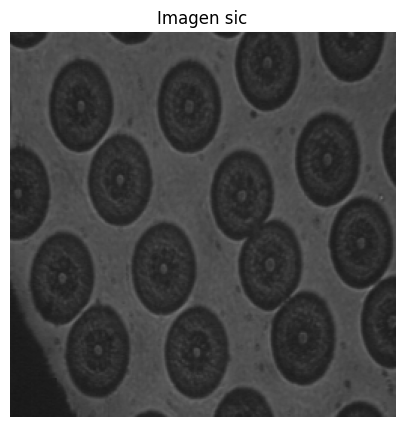

In [3]:
ruta_sic = './images/sic.png'
img_sic = cv2.imread(ruta_sic, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_sic, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen sic')
ax.axis('off')
plt.show()

### 4.2 Umbralizado de la imagen para ceparar las celulas del fondo.



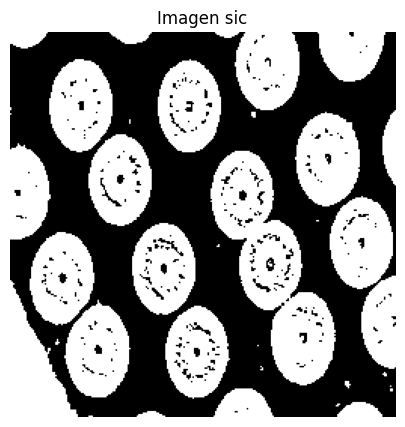

In [60]:
img_morpho_bin = cv2.threshold(img_sic, 56, 255, cv2.THRESH_BINARY)[1]
img_morpho_bin = cv2.bitwise_not(img_morpho_bin)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_morpho_bin, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen sic')
ax.axis('off')
plt.show()

### 4.3 Dilataciones para rellenar los huecos de las celulas usando una mascara en cruz 3x3.

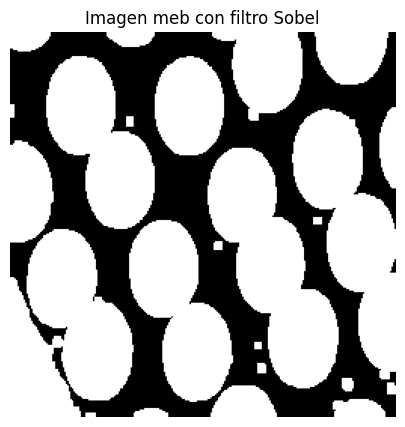

In [61]:
def create_cross_mask(size):
    mask = np.full((size, size), np.nan)
    center = size // 2
    mask[center, :] = 1
    mask[:, center] = 1
    return mask

cross_mask = create_cross_mask(3)
dilated_image = img_morpho_bin
for i in range(2):
    dilated_image = dilation(dilated_image, footprint=cross_mask)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(dilated_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen meb con filtro Sobel')
ax.axis('off')
plt.show()



### 4.4 Cambio de mascaras, remplazando por mascaras lineales

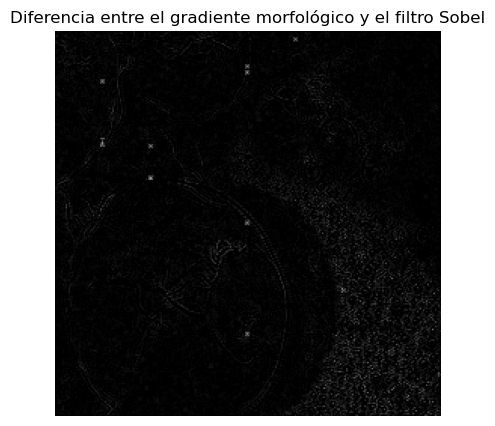

In [27]:
dif = cv2.subtract(mgimage, img_meb_norma)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(dif, cmap='gray', vmin=0, vmax=255)
ax.set_title('Diferencia entre el gradiente morfológico y el filtro Sobel')
ax.axis('off')
plt.show()

### Etiquetado y visualización del resultado

**¿Qué ocurrio conel borde?**
